# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly

from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from collections import Counter
from imblearn.over_sampling import SMOTE

from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, f1_score
from sklearn import metrics
from sklearn.feature_selection import RFE

import pickle

In [4]:
data = pd.read_csv('../Data/Hotel Reservations.csv')

In [5]:
data.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


# Exploratory Data Analysis

## Descriptive Analysis

In [4]:
data.shape

(36275, 19)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [6]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Booking_ID,36275,36275,INN00001,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
no_of_adults,36275.0,NaN,NaN,NaN,1.844962,0.518715,0.0,2.0,2.0,2.0,4.0
no_of_children,36275.0,NaN,NaN,NaN,0.105279,0.402648,0.0,0.0,0.0,0.0,10.0
no_of_weekend_nights,36275.0,NaN,NaN,NaN,0.810724,0.870644,0.0,0.0,1.0,2.0,7.0
no_of_week_nights,36275.0,NaN,NaN,NaN,2.2043,1.410905,0.0,1.0,2.0,3.0,17.0
type_of_meal_plan,36275,4,Meal Plan 1,27835,NaN,NaN,NaN,NaN,NaN,NaN,NaN
required_car_parking_space,36275.0,NaN,NaN,NaN,0.030986,0.173281,0.0,0.0,0.0,0.0,1.0
room_type_reserved,36275,7,Room_Type 1,28130,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lead_time,36275.0,NaN,NaN,NaN,85.232557,85.930817,0.0,17.0,57.0,126.0,443.0
arrival_year,36275.0,NaN,NaN,NaN,2017.820427,0.383836,2017.0,2018.0,2018.0,2018.0,2018.0


In [7]:
data.isna().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [8]:
data.duplicated().any()

False

In [9]:
data['booking_status'].value_counts()

Not_Canceled    24390
Canceled        11885
Name: booking_status, dtype: int64

# Data Visualization

In [10]:
plt.rcParams["figure.figsize"] = [10, 7]
plt.rcParams["figure.autolayout"] = True

**Target Variable**

In [11]:
values = np.array([len(data[data['booking_status']=='Not_Canceled']), len(data[data['booking_status']=='Canceled'])])
labels = ['Not Cancelled', 'Cancelled']
fig = plotly.graph_objects.Figure(data = [plotly.graph_objects.Pie(values = values, labels = labels, hole = 0.5, textinfo = 'percent', title = " ")])
text_title = "Hotel Reservation Booking Status"
fig.update_layout(height = 500, width = 800, showlegend = True, title = dict(text = text_title, x = 0.5, y = 0.95)) 
fig.show()

**Features**

In [12]:
col = data.columns

In [13]:
object_columns = data.select_dtypes('object').columns
numerical_columns = data.select_dtypes(['int64','float64']).columns
object_df = data[object_columns]
numerical_df = data[numerical_columns]

In [14]:
discrete_columns = [col for col in numerical_columns if data[col].nunique()<60]
discrete_df = data[discrete_columns]

In [15]:
categorical_df = pd.concat([object_df,discrete_df],axis=1)
categorical_df.drop(columns=['booking_status','Booking_ID'],inplace=True)

In [16]:
continuous_columns = [col for col in numerical_columns if col not in discrete_columns]
continuous_df = data[continuous_columns]

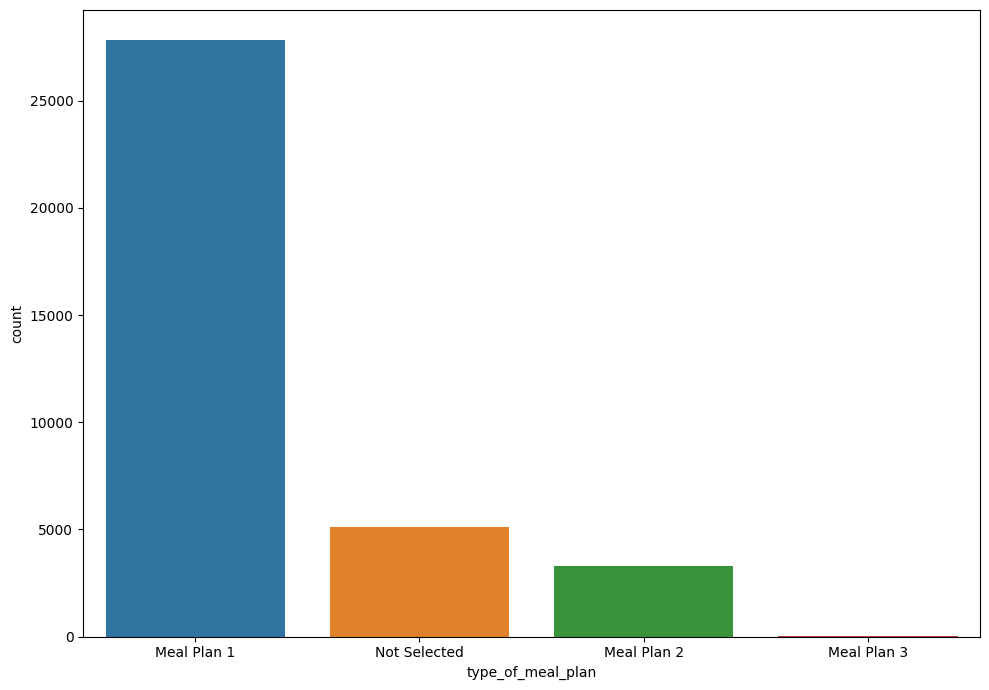

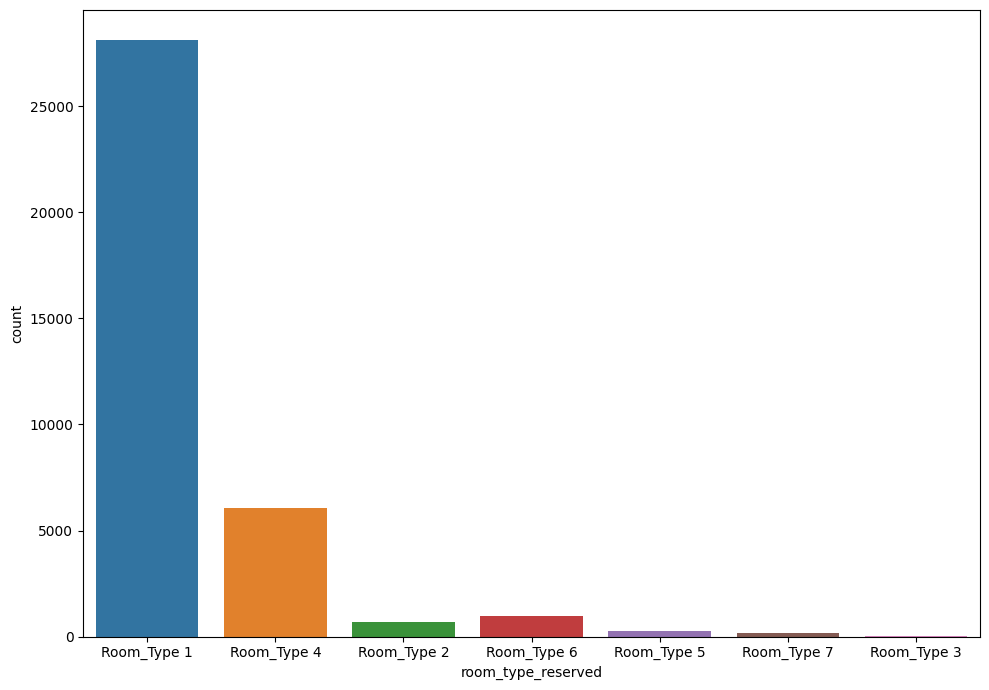

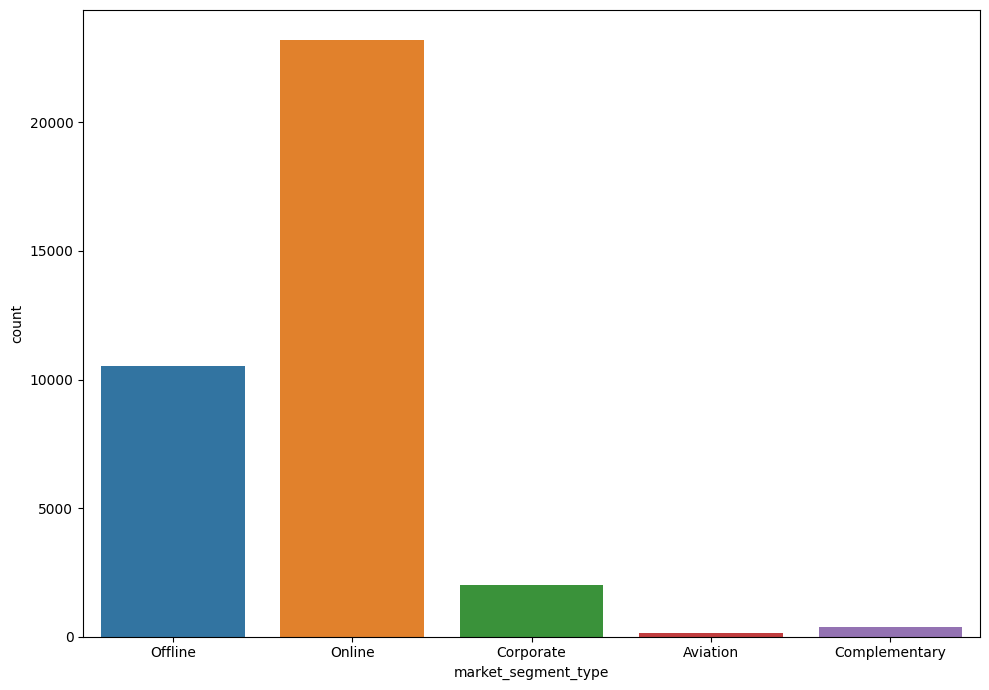

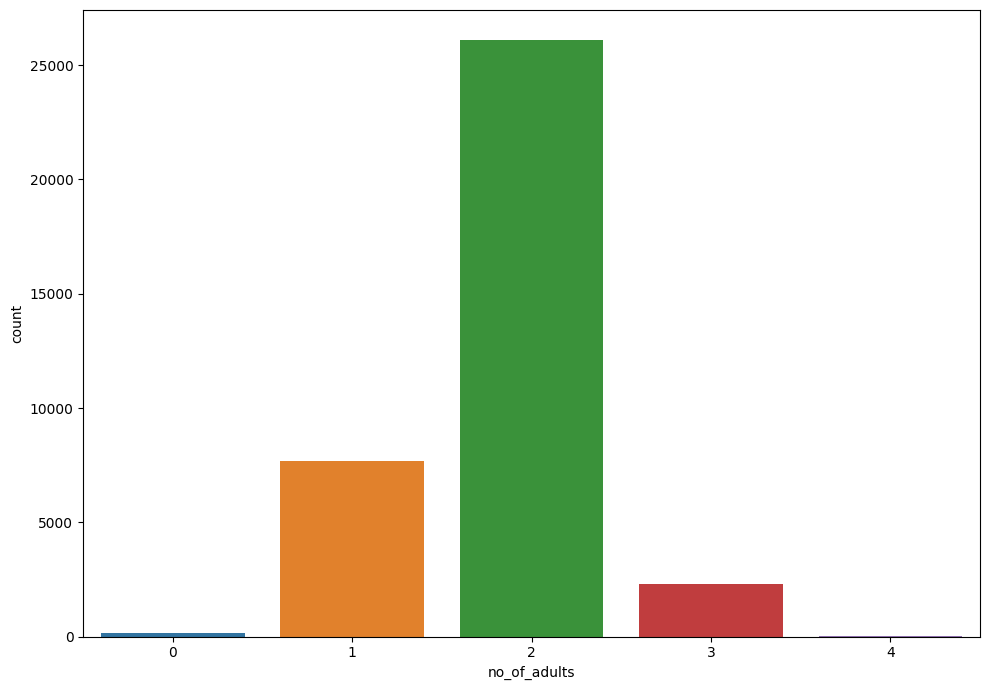

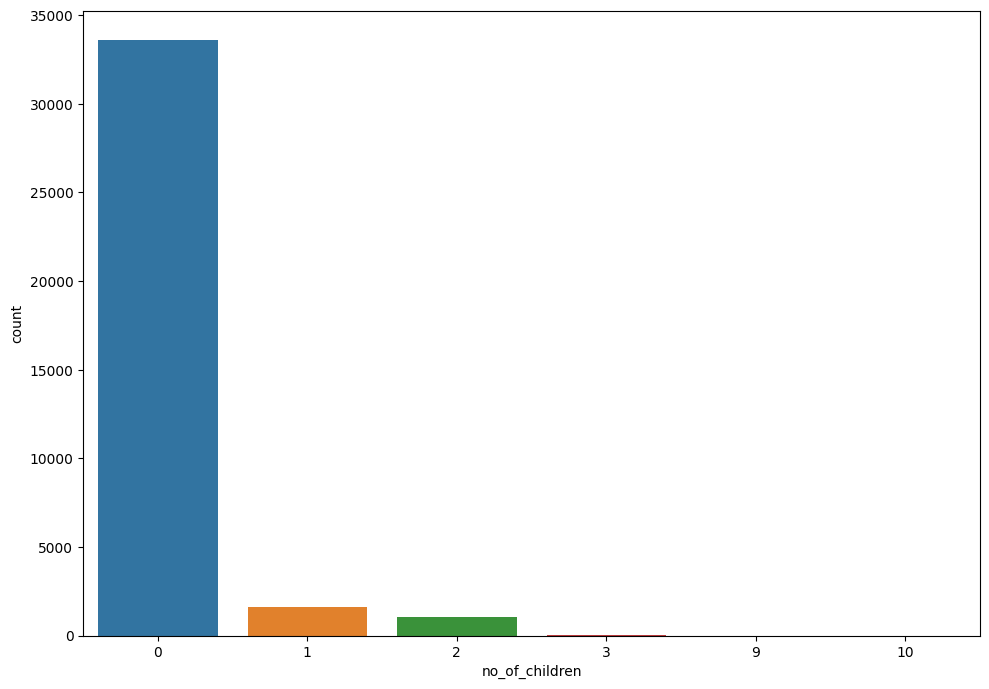

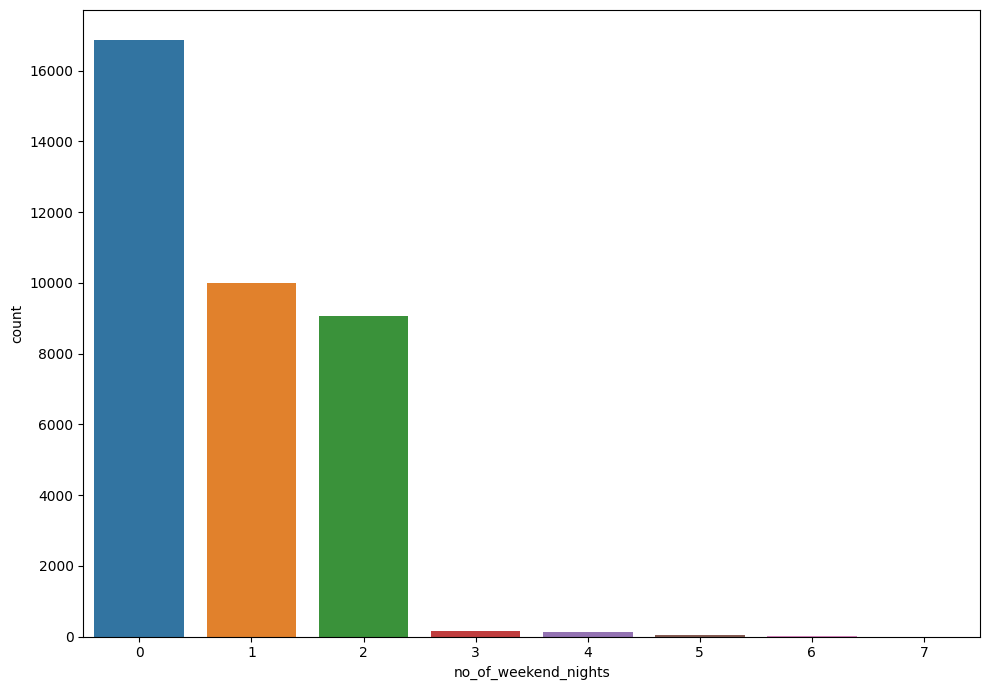

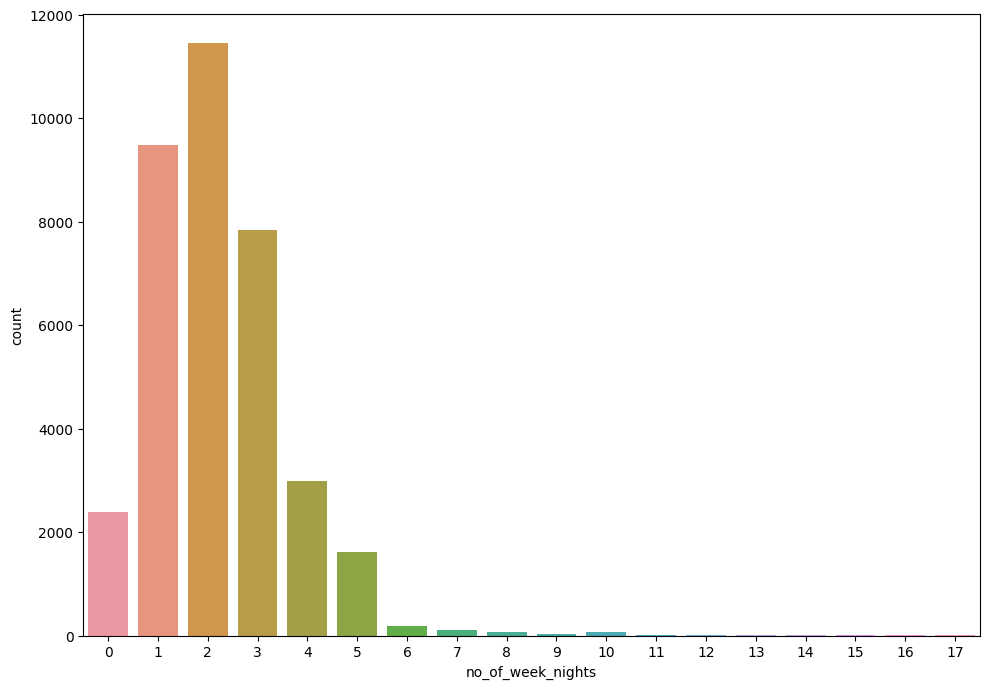

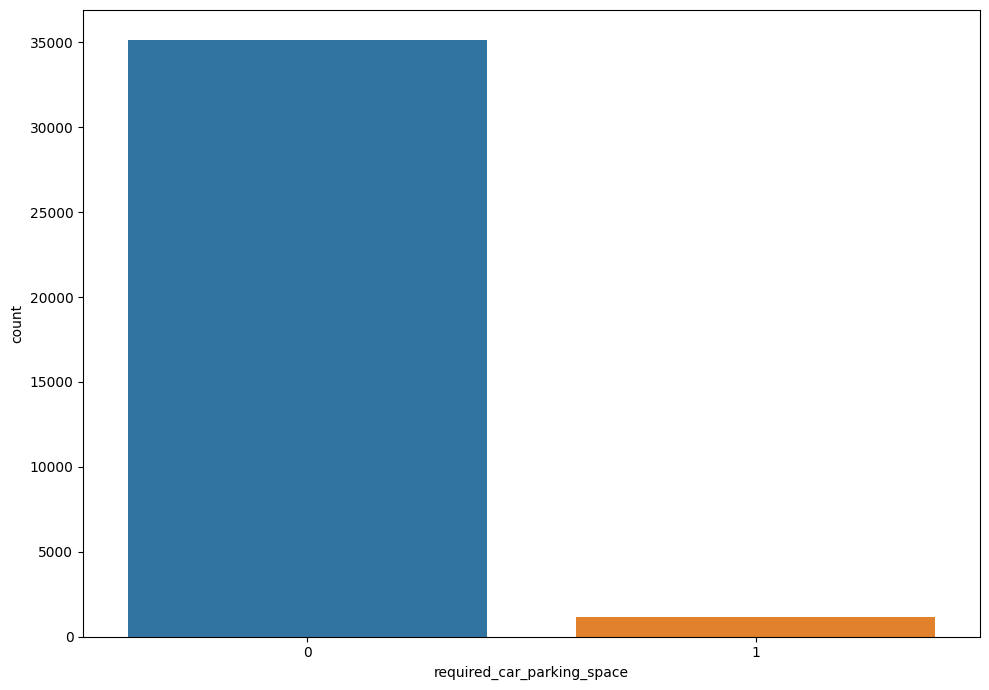

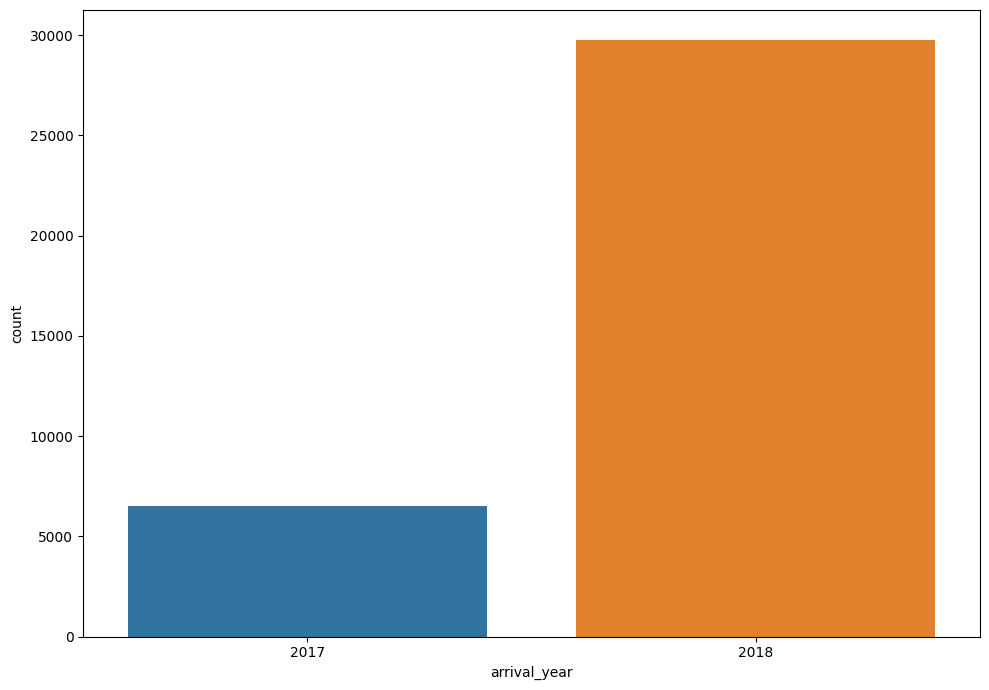

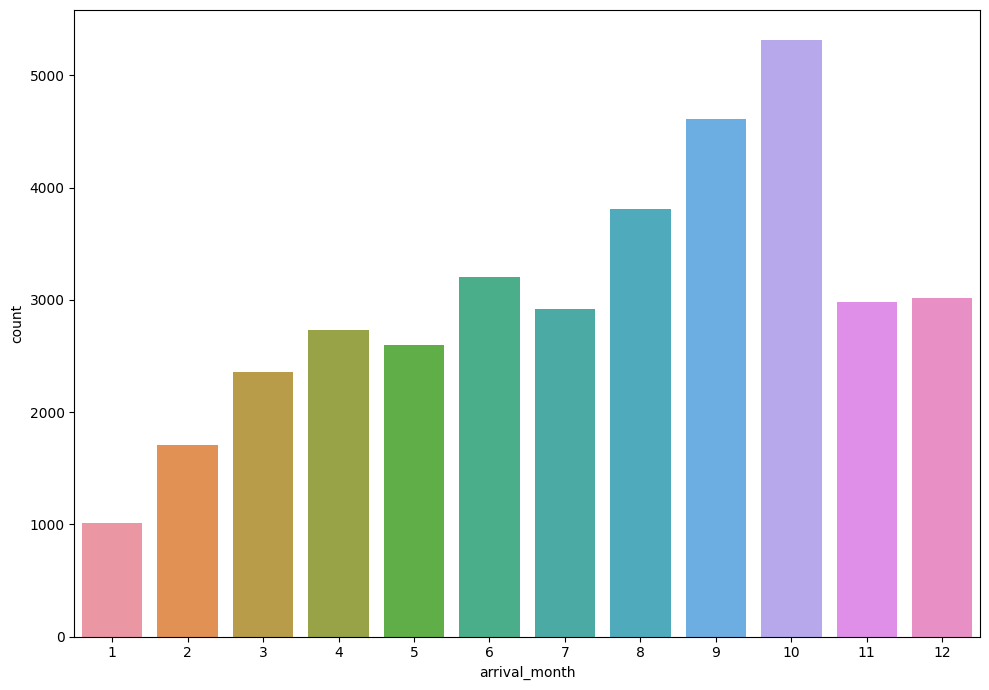

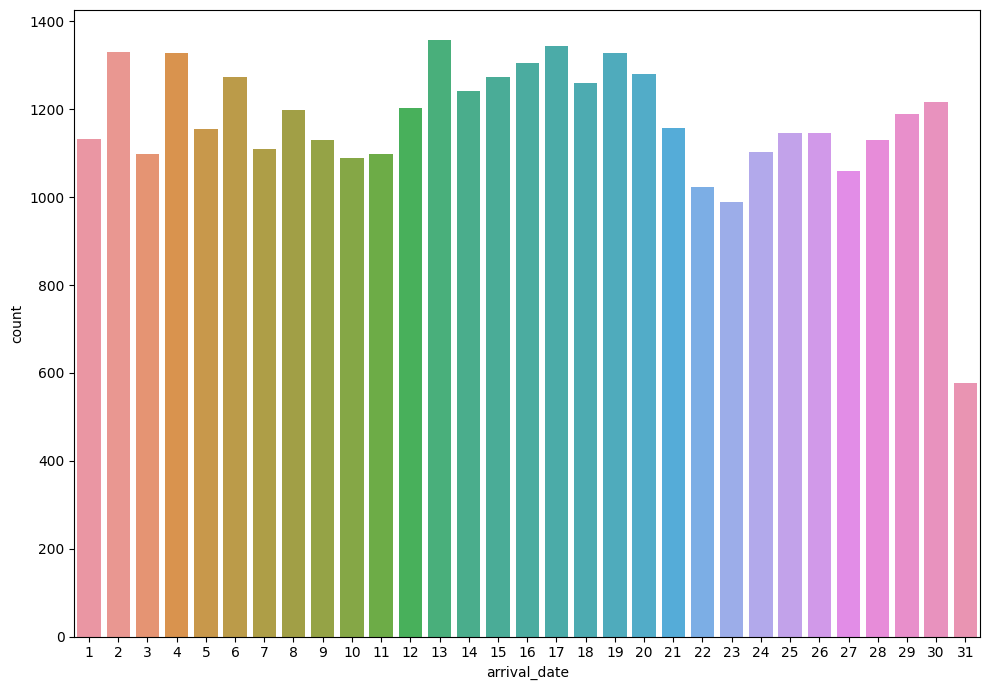

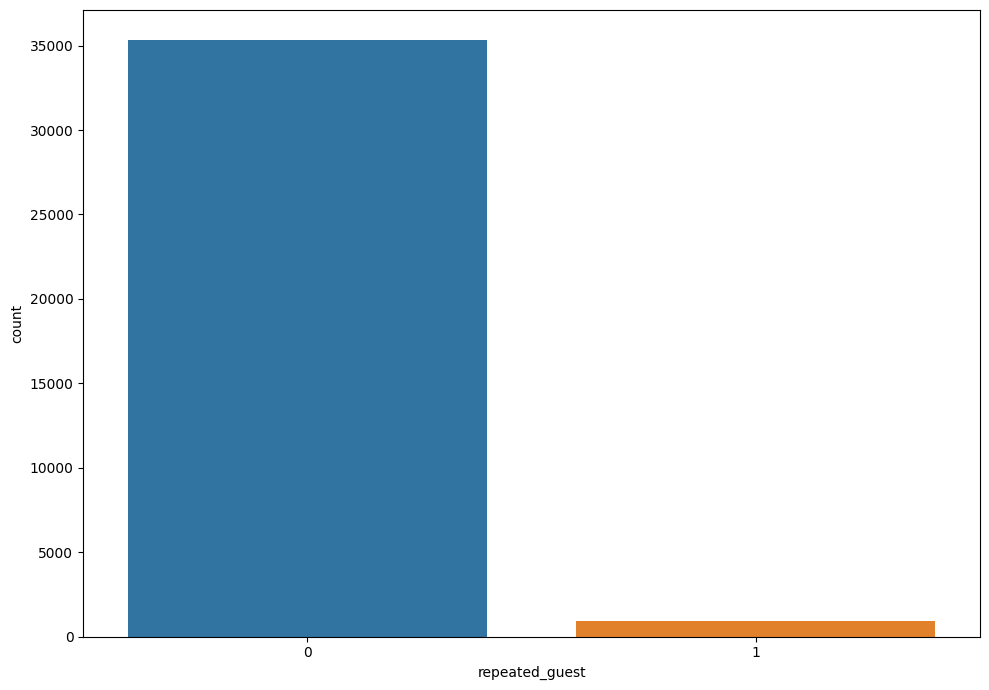

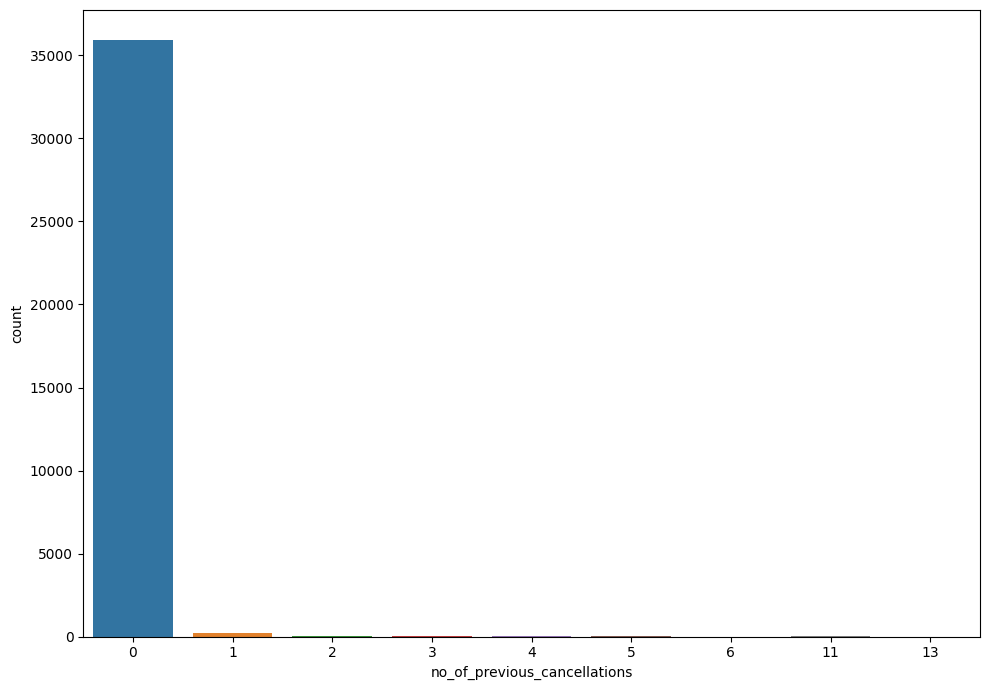

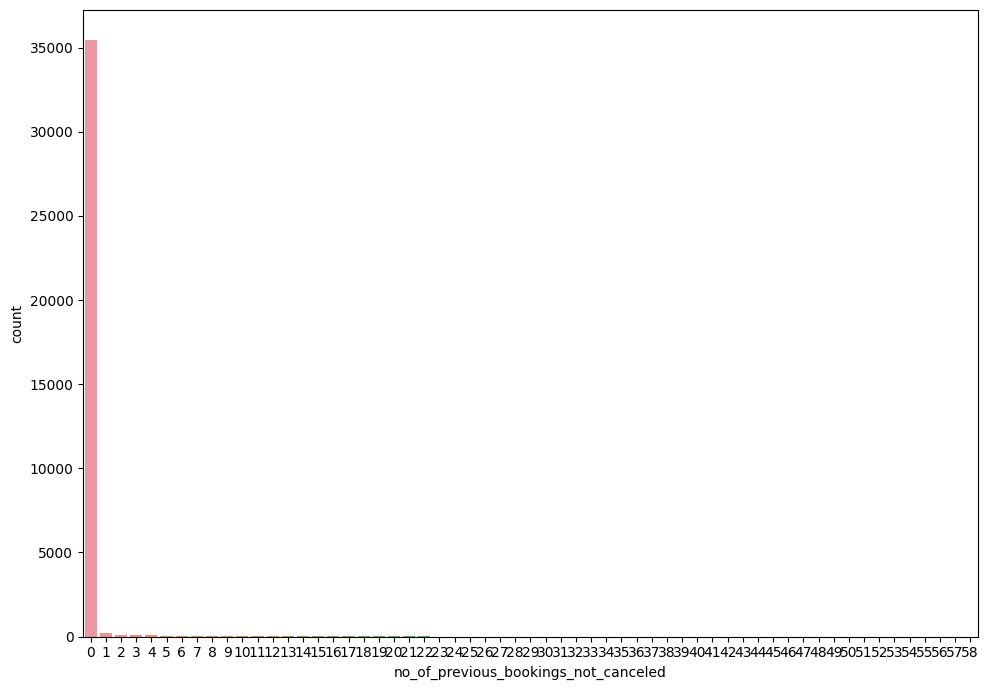

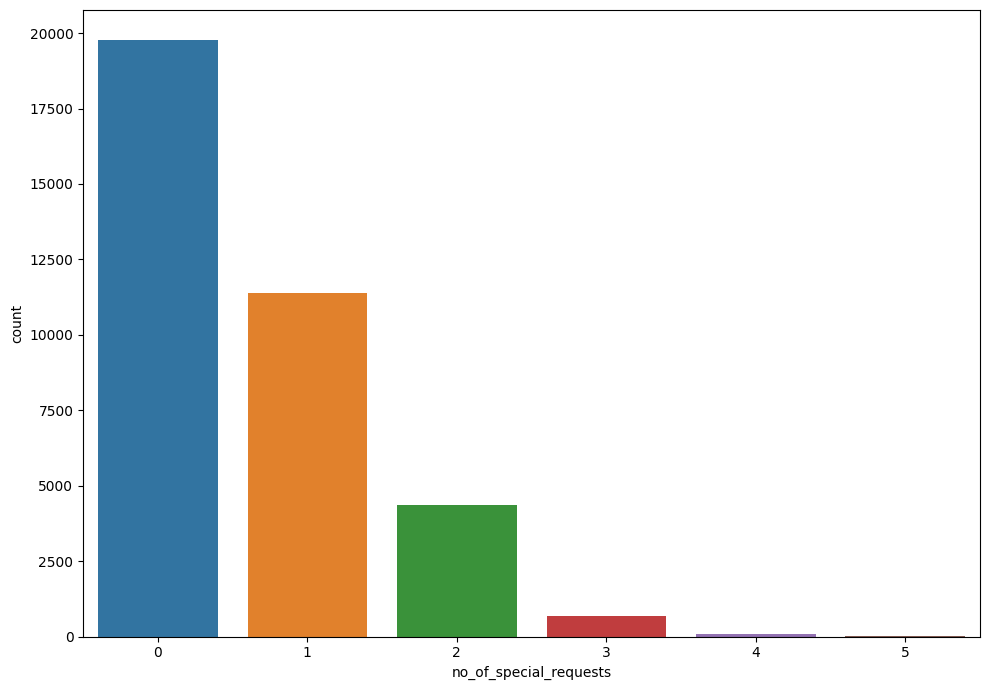

In [17]:
# Categorical Variables
for col in categorical_df:
    sns.countplot(x=col, data=categorical_df)
    plt.show()

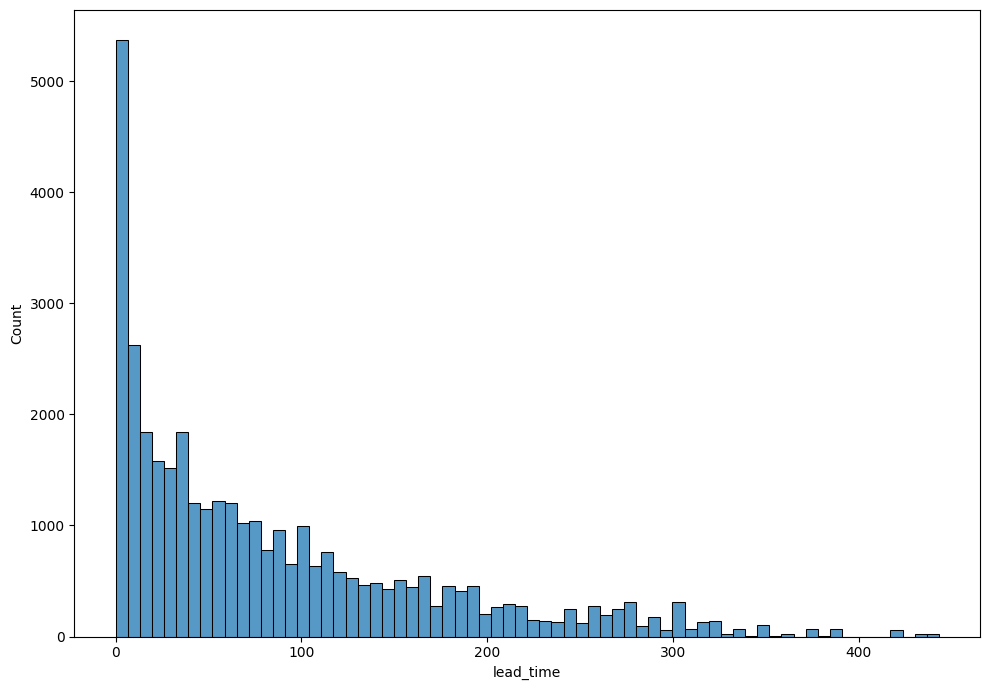

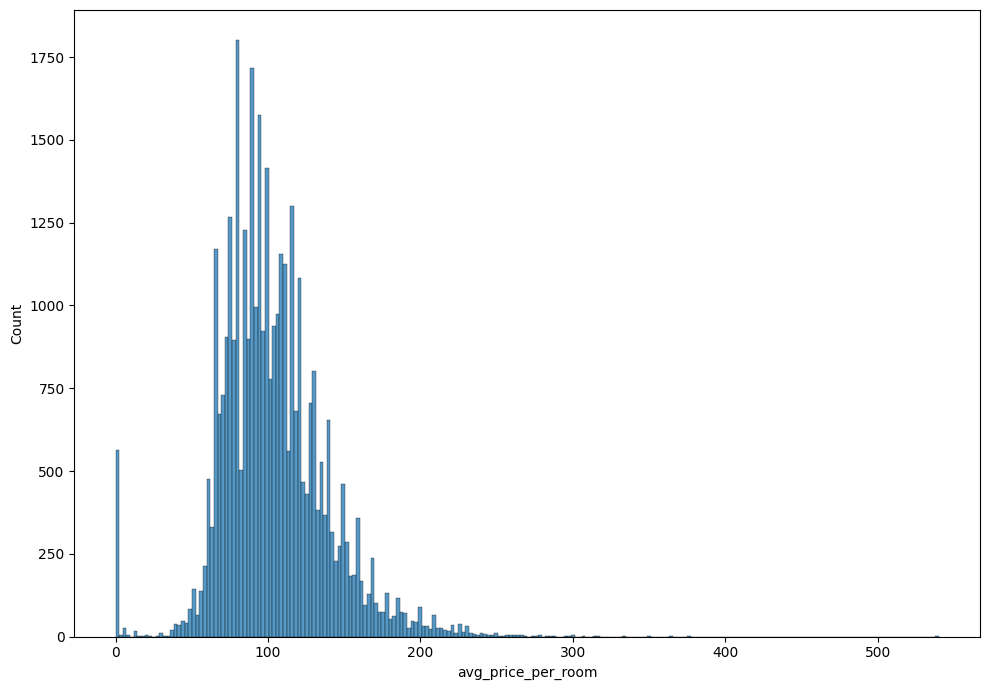

In [18]:
#Continuous Variables
for col in continuous_df:
    #sns.histplot(x=col, data=continuous_df)
    sns.histplot(continuous_df[col])
    plt.show()

C:\Users\Rocelle Nathalie Ong\AppData\Local\Temp\ipykernel_20900\2971101658.py:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



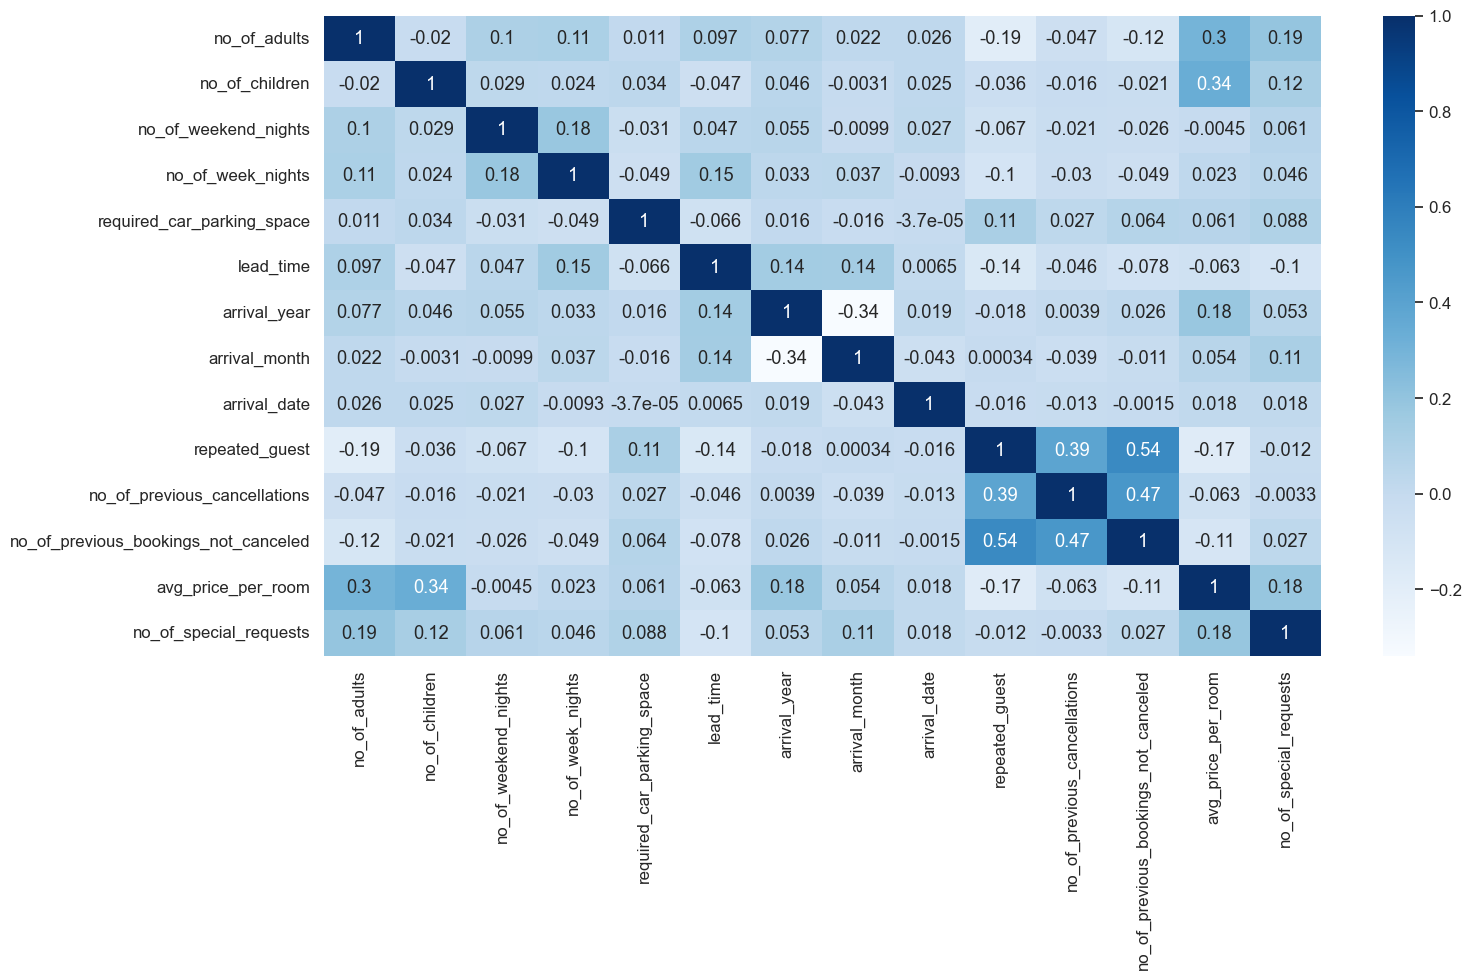

In [19]:
plt.figure(figsize=(16,10))
sns.set(font_scale=1.1)
sns.heatmap(data.corr(),annot=True,cmap="Blues")
plt.show()

## Feature Engineering

In [20]:
data_copy = data.copy()

In [21]:
for col in data_copy:
    print(f'{col}: {data_copy[col].unique()}')
    print('--------------------------')

Booking_ID: ['INN00001' 'INN00002' 'INN00003' ... 'INN36273' 'INN36274' 'INN36275']
--------------------------
no_of_adults: [2 1 3 0 4]
--------------------------
no_of_children: [ 0  2  1  3 10  9]
--------------------------
no_of_weekend_nights: [1 2 0 4 3 6 5 7]
--------------------------
no_of_week_nights: [ 2  3  1  4  5  0 10  6 11  7 15  9 13  8 14 12 17 16]
--------------------------
type_of_meal_plan: ['Meal Plan 1' 'Not Selected' 'Meal Plan 2' 'Meal Plan 3']
--------------------------
required_car_parking_space: [0 1]
--------------------------
room_type_reserved: ['Room_Type 1' 'Room_Type 4' 'Room_Type 2' 'Room_Type 6' 'Room_Type 5'
 'Room_Type 7' 'Room_Type 3']
--------------------------
lead_time: [224   5   1 211  48 346  34  83 121  44   0  35  30  95  47 256  99  12
 122   2  37 130  60  56   3 107  72  23 289 247 186  64  96  41  55 146
  32  57   7 124 169   6  51  13 100 139 117  39  86  19 192 179  26  74
 143 177  18 267 155  46 128  20  40 196 188  17 110  68  73

In [22]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [23]:
to_convert = ['type_of_meal_plan','room_type_reserved','market_segment_type','booking_status']
label_encoder = preprocessing.LabelEncoder()

for i in to_convert:
    data_copy[i+'_new'] = label_encoder.fit_transform(data_copy[i])

In [24]:
data_copy.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,...,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,type_of_meal_plan_new,room_type_reserved_new,market_segment_type_new,booking_status_new
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,...,0,0,0,65.00,0,Not_Canceled,0,0,3,1
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,...,0,0,0,106.68,1,Not_Canceled,3,0,4,1
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,...,0,0,0,60.00,0,Canceled,0,0,4,0
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,...,0,0,0,100.00,0,Canceled,0,0,4,0
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,...,0,0,0,94.50,0,Canceled,3,0,4,0


In [25]:
to_drop = ['type_of_meal_plan','room_type_reserved','market_segment_type','booking_status','Booking_ID']
print(to_drop)

['type_of_meal_plan', 'room_type_reserved', 'market_segment_type', 'booking_status', 'Booking_ID']


In [26]:
data_copy.drop(columns=to_drop, inplace=True)
data_copy.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,type_of_meal_plan_new,room_type_reserved_new,market_segment_type_new,booking_status_new
0,2,0,1,2,0,224,2017,10,2,0,0,0,65.00,0,0,0,3,1
1,2,0,2,3,0,5,2018,11,6,0,0,0,106.68,1,3,0,4,1
2,1,0,2,1,0,1,2018,2,28,0,0,0,60.00,0,0,0,4,0
3,2,0,0,2,0,211,2018,5,20,0,0,0,100.00,0,0,0,4,0
4,2,0,1,1,0,48,2018,4,11,0,0,0,94.50,0,3,0,4,0


In [27]:
X = data_copy.drop(columns = 'booking_status_new')
y = data_copy['booking_status_new']

In [28]:
print("Independent Variable data size:", X.shape)
print("Dependent Variable data size:", y.shape)

Independent Variable data size: (36275, 17)
Dependent Variable data size: (36275,)


In [29]:
norm = MinMaxScaler().fit(X)
X_norm = pd.DataFrame(norm.transform(X))
X_norm.columns=X.columns
print("Normalized X data size:", X_norm.shape)

Normalized X data size: (36275, 17)


In [30]:
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.3, random_state=42)

print('Shape of training feature:', X_train.shape)
print('Shape of testing feature:', X_test.shape)
print('Shape of training label:', y_train.shape)
print('Shape of training label:', y_test.shape)

Shape of training feature: (25392, 17)
Shape of testing feature: (10883, 17)
Shape of training label: (25392,)
Shape of training label: (10883,)


Class=0, n=8278 (32.601%)
Class=1, n=17114 (67.399%)


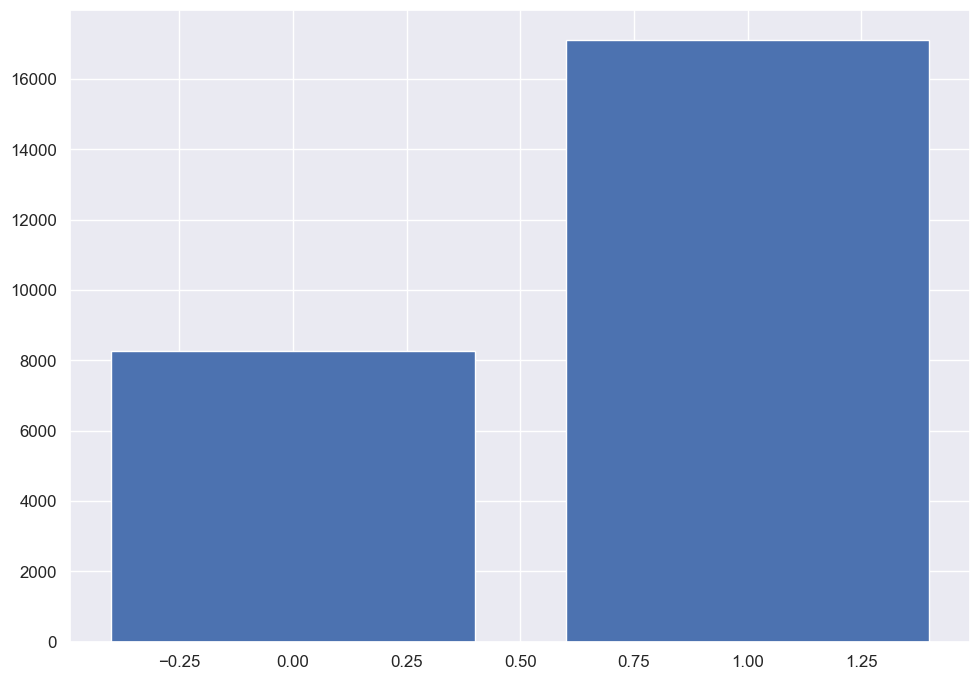

In [31]:
counter = Counter(y_train)
for k,v in counter.items():
	per = v / len(y_train) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()

In [32]:
sm = SMOTE(random_state = 2)
X_train, y_train = sm.fit_resample(X_train,y_train)

Class=0, n=17114 (50.000%)
Class=1, n=17114 (50.000%)


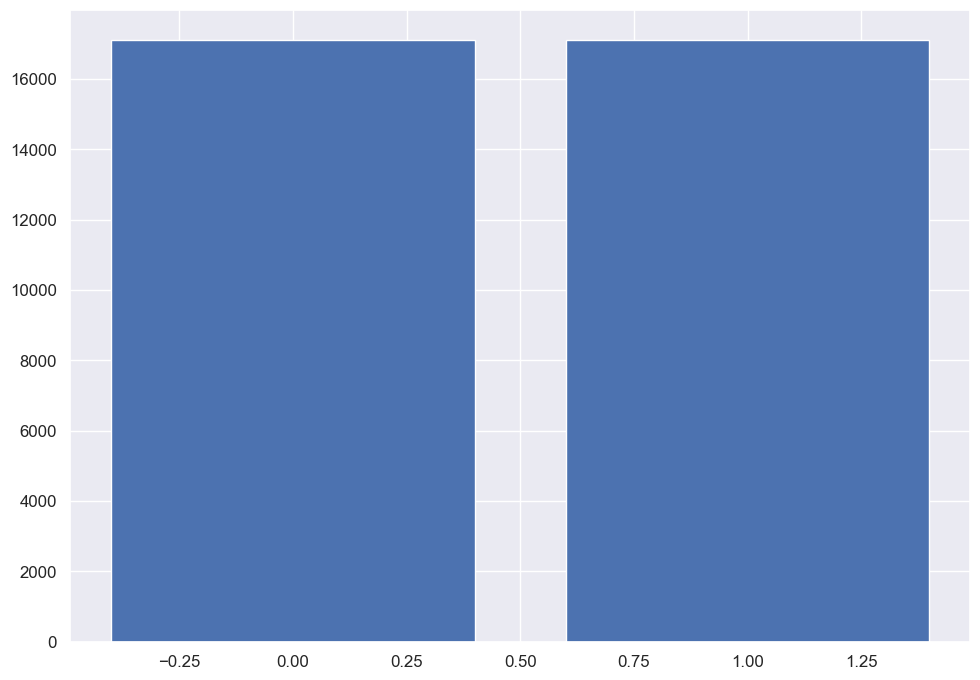

In [33]:
counter = Counter(y_train)
for k,v in counter.items():
	per = v / len(y_train) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()

## Model Development

In [34]:
def fit_model(model, X_train, y_train):
    model.fit(X_train, y_train)

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print('Accuracy score:',accuracy_score(y_test, y_pred))
    print('F1_score:',f1_score(y_test ,y_pred))
    cm = metrics.confusion_matrix(y_test, y_pred)
    report = metrics.classification_report(y_test, y_pred, digits=3)
    return {'cm':cm, 'report':report}

def print_results(model, X_train, X_test, y_train, y_test):
  for model_key, model_values in model.items():
    print('------------')
    print('Model: ',model_key)
    fit_model(model_values,X_train,y_train)
    mod = evaluate_model(model_values, X_test, y_test)

    print('Confusion Matrix:\n', mod['cm'])
    print('Report:\n', mod['report'])

In [35]:
# Decision Tree model 
dt = DecisionTreeClassifier(random_state=0)
# Extra Trees Classifier model
ex = ExtraTreesClassifier()
# Random Forest model
rf = RandomForestClassifier(n_estimators=200)
# Naive Bayes model 
nb = GaussianNB()
# XGboost Classifier model 
xgb = XGBClassifier()

model = {'DecisionTree':dt, 'ExtraTree':ex, 'RandomForest': rf, 'NaiveBayes': nb, 'XGboost':xgb}

In [36]:
print_results(model, X_train, X_test, y_train, y_test)

------------
Model:  DecisionTree
Accuracy score: 0.8617109252963338
F1_score: 0.895551391491429
Confusion Matrix:
 [[2926  681]
 [ 824 6452]]
Report:
               precision    recall  f1-score   support

           0      0.780     0.811     0.795      3607
           1      0.905     0.887     0.896      7276

    accuracy                          0.862     10883
   macro avg      0.842     0.849     0.845     10883
weighted avg      0.863     0.862     0.862     10883

------------
Model:  ExtraTree
Accuracy score: 0.8952494716530368
F1_score: 0.9222161572052401
Confusion Matrix:
 [[2985  622]
 [ 518 6758]]
Report:
               precision    recall  f1-score   support

           0      0.852     0.828     0.840      3607
           1      0.916     0.929     0.922      7276

    accuracy                          0.895     10883
   macro avg      0.884     0.878     0.881     10883
weighted avg      0.895     0.895     0.895     10883

------------
Model:  RandomForest
Accuracy s

Selected Model:Random Forest 
1. High accuracy
2. High f1, precision and recall per label
3. Has lesser false positive and false negative errors

In [40]:
df_importance = pd.DataFrame()
df_importance['Features'] = X.columns
df_importance['Importance'] = rf.feature_importances_
#plt.figure(figsize=(10, 12))
#sns.barplot(data = df_importance.sort_values("Importance", ascending=False), y='Features', x='Importance');
top10 = list(df_importance.sort_values("Importance", ascending=False)['Features'].head(10).values)
top10

['lead_time',
 'avg_price_per_room',
 'no_of_special_requests',
 'arrival_month',
 'arrival_date',
 'no_of_week_nights',
 'market_segment_type_new',
 'no_of_weekend_nights',
 'arrival_year',
 'no_of_adults']

In [47]:
data_top10= X_norm[top10]
data_top10

,lead_time,avg_price_per_room,no_of_special_requests,arrival_month,arrival_date,no_of_week_nights,market_segment_type_new,no_of_weekend_nights,arrival_year,no_of_adults
0,0.505643,0.120370,0.0,0.818182,0.033333,0.117647,0.75,0.142857,0.0,0.50
1,0.011287,0.197556,0.2,0.909091,0.166667,0.176471,1.00,0.285714,1.0,0.50
2,0.002257,0.111111,0.0,0.090909,0.900000,0.058824,1.00,0.285714,1.0,0.25
3,0.476298,0.185185,0.0,0.363636,0.633333,0.117647,1.00,0.000000,1.0,0.50
4,0.108352,0.175000,0.0,0.272727,0.333333,0.058824,1.00,0.142857,1.0,0.50
...,...,...,...,...,...,...,...,...,...,...
36270,0.191874,0.310741,0.2,0.636364,0.066667,0.352941,1.00,0.285714,1.0,0.75
36271,0.514673,0.168426,0.4,0.818182,0.533333,0.176471,1.00,0.142857,1.0,0.50
36272,0.334086,0.182204,0.4,0.545455,0.000000,0.352941,1.00,0.285714,1.0,0.50
36273,0.142212,0.175000,0.0,0.272727,0.666667,0.176471,1.00,0.000000,1.0,0.50


In [48]:
X_train, X_test, y_train, y_test = train_test_split(data_top10, y, test_size=0.3, random_state=42)

print('Shape of training feature:', X_train.shape)
print('Shape of testing feature:', X_test.shape)
print('Shape of training label:', y_train.shape)
print('Shape of training label:', y_test.shape)

Shape of training feature: (25392, 10)
Shape of testing feature: (10883, 10)
Shape of training label: (25392,)
Shape of training label: (10883,)


In [49]:
rf = RandomForestClassifier(n_estimators=200)
model = {'RandomForest': rf}
print_results(model, X_train, X_test, y_train, y_test)

------------
Model:  RandomForest
Accuracy score: 0.9027841587797483
F1_score: 0.9286292498650836
Confusion Matrix:
 [[2942  665]
 [ 393 6883]]
Report:
               precision    recall  f1-score   support

           0      0.882     0.816     0.848      3607
           1      0.912     0.946     0.929      7276

    accuracy                          0.903     10883
   macro avg      0.897     0.881     0.888     10883
weighted avg      0.902     0.903     0.902     10883



In [50]:
with open('model.pkl', 'wb') as files:
    pickle.dump(rf, files)